In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#######################
# DATASET PREPARATION #
#######################

In [3]:
# Read data from given file name
def read_datasource(filename):
    src_data = pd.read_csv(filename)
    return src_data 
    
# Merging datasets
def data_merging(dt1, dt2):
    # Date conversion to common date format
    dt1['Data'] = pd.to_datetime(dt1['Data'])  # Assuming 'YYYY-MM-DD' format
    dt2['Date'] = pd.to_datetime(dt2['Date'], format='%m/%d/%y')  # Explicit format
    
    # Merge datasets on date
    merged_dataset = pd.merge(dt1, dt2, left_on='Data', right_on='Date', how='inner')

    return merged_dataset

In [4]:
# Files with data sources:
file_spx500 = 'spx500.csv'
file_yield_curve = 'yield-curve-rates.csv'

In [5]:
# loading files
dt_spx500 = read_datasource(file_spx500)
dt_yieldcrv = read_datasource(file_yield_curve)

In [6]:
# Display the first 3 rows
print("SPX500 Data:")
print(dt_spx500.head(5))

print("\nYield Curve Data:")
print(dt_yieldcrv.head(5))

SPX500 Data:
         Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen
0  1990-01-02    353.40     359.69     351.98      359.69   90038889.0
1  1990-01-03    359.69     360.59     357.89      358.76  106850000.0
2  1990-01-04    358.76     358.76     352.89      355.67   98333333.0
3  1990-01-05    355.67     355.67     351.35      352.20   88072222.0
4  1990-01-08    352.20     354.24     350.54      353.79   77838889.0

Yield Curve Data:
       Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0  12/31/24  4.40  4.39  4.37  4.32  4.24  4.16  4.25  4.27  4.38  4.48   
1  12/30/24  4.43  4.42  4.37  4.33  4.25  4.17  4.24  4.29  4.37  4.46   
2  12/27/24  4.44  4.43  4.31  4.35  4.29  4.20  4.31  4.36  4.45  4.53   
3  12/26/24  4.45  4.45  4.35  4.37  4.31  4.23  4.30  4.35  4.42  4.49   
4  12/24/24  4.44  4.44  4.40  4.38  4.30  4.24  4.29  4.36  4.43  4.52   

   10 Yr  20 Yr  30 Yr  
0   4.58   4.86   4.78  
1   4.55   4.84   4.77  
2   4.62   4.89 

In [7]:
# merging datasets
ds_merged = data_merging(dt_spx500, dt_yieldcrv)

In [8]:
print("\nMerged dataset:")
print(ds_merged.head(10))


Merged dataset:
        Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
0 1990-01-02    353.40     359.69     351.98      359.69   90038889.0   
1 1990-01-03    359.69     360.59     357.89      358.76  106850000.0   
2 1990-01-04    358.76     358.76     352.89      355.67   98333333.0   
3 1990-01-05    355.67     355.67     351.35      352.20   88072222.0   
4 1990-01-08    352.20     354.24     350.54      353.79   77838889.0   
5 1990-01-09    353.83     354.17     349.61      349.62   86227778.0   
6 1990-01-10    349.62     349.62     344.32      347.31   97772222.0   
7 1990-01-11    347.31     350.14     347.31      348.53   85772222.0   
8 1990-01-12    348.53     348.53     339.49      339.93  102155556.0   
9 1990-01-16    337.00     340.75     333.37      340.75  103372222.0   

        Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0 1990-01-02   NaN   NaN  7.83   NaN  7.89  7.81  7.87  7.90  7.87  7.98   
1 1990-01-03   NaN   NaN  7

In [9]:
# Saving merged data to output file
ds_merged.to_csv('merged_data.csv', index=False)

In [10]:
########################
# EXPANSION OF DATASET #
########################

In [11]:
# Calculating daily price change in %

In [12]:
#loading merged file
dataset_extended = pd.read_csv('merged_data.csv')

In [13]:
dataset_extended['Daily index price Change (%)'] = dataset_extended['Zamkniecie'].pct_change() * 100

In [14]:
print(dataset_extended.head(10))

         Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
0  1990-01-02    353.40     359.69     351.98      359.69   90038889.0   
1  1990-01-03    359.69     360.59     357.89      358.76  106850000.0   
2  1990-01-04    358.76     358.76     352.89      355.67   98333333.0   
3  1990-01-05    355.67     355.67     351.35      352.20   88072222.0   
4  1990-01-08    352.20     354.24     350.54      353.79   77838889.0   
5  1990-01-09    353.83     354.17     349.61      349.62   86227778.0   
6  1990-01-10    349.62     349.62     344.32      347.31   97772222.0   
7  1990-01-11    347.31     350.14     347.31      348.53   85772222.0   
8  1990-01-12    348.53     348.53     339.49      339.93  102155556.0   
9  1990-01-16    337.00     340.75     333.37      340.75  103372222.0   

         Date  1 Mo  2 Mo  3 Mo  ...  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0  1990-01-02   NaN   NaN  7.83  ...  7.89  7.81  7.87  7.90  7.87  7.98   
1  1990-01-03   NaN   NaN  7.89  

In [15]:
#Calculating trend

In [16]:
dataset_extended['Trend'] = (dataset_extended['Daily index price Change (%)'] > 0).astype(int)
print(dataset_extended[['Date', 'Daily index price Change (%)', 'Trend']].head(10))

         Date  Daily index price Change (%)  Trend
0  1990-01-02                           NaN      0
1  1990-01-03                     -0.258556      0
2  1990-01-04                     -0.861300      0
3  1990-01-05                     -0.975623      0
4  1990-01-08                      0.451448      1
5  1990-01-09                     -1.178665      0
6  1990-01-10                     -0.660717      0
7  1990-01-11                      0.351271      1
8  1990-01-12                     -2.467506      0
9  1990-01-16                      0.241226      1


In [17]:
# Calculating basic stock indicators

In [18]:
# Stochastic - STS

In [19]:
df = dataset_extended
df["Data"] = pd.to_datetime(df["Data"])

# Obliczenie oscylatora stochastycznego (%K) tylko na podstawie cen zamknięcia
okres = 14  # Możesz zmienić okres według potrzeb
df["Lowest_Close"] = df["Zamkniecie"].rolling(window=okres).min()
df["Highest_Close"] = df["Zamkniecie"].rolling(window=okres).max()
df["STS"] = 100 * (df["Zamkniecie"] - df["Lowest_Close"]) / (df["Highest_Close"] - df["Lowest_Close"])

# Usunięcie pomocniczych kolumn
df.drop(columns=["Lowest_Close", "Highest_Close"], inplace=True)

# Wyświetlenie wyników
print(df)

           Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0    1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1    1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2    1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3    1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4    1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...         ...       ...        ...        ...         ...           ...   
8740 2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741 2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742 2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743 2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744 2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 

In [20]:
# Moving Average Convergence Divergence - MACD

In [21]:
krótka_srednia = 12  # Szybka EMA
długa_srednia = 26   # Wolna EMA
sygnal_srednia = 9   # Linia sygnałowa

df["EMA_12"] = df["Zamkniecie"].ewm(span=krótka_srednia, adjust=False).mean()
df["EMA_26"] = df["Zamkniecie"].ewm(span=długa_srednia, adjust=False).mean()
df["MACD"] = df["EMA_12"] - df["EMA_26"]
df["MACD_Signal"] = df["MACD"].ewm(span=sygnal_srednia, adjust=False).mean()

# Usunięcie pomocniczych kolumn
df.drop(columns=["EMA_12", "EMA_26"], inplace=True)

# Wyświetlenie wyników
print(df)

           Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0    1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1    1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2    1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3    1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4    1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...         ...       ...        ...        ...         ...           ...   
8740 2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741 2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742 2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743 2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744 2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  5 Yr  7 Yr  10 Yr  20 Yr  30 Yr  \

In [22]:
# Relative Strength Index - RSI

In [23]:
okres = 14  # Standardowy okres dla RSI
df["Zmiana"] = df["Zamkniecie"].diff()
df["Wzrost"] = df["Zmiana"].apply(lambda x: x if x > 0 else 0)
df["Spadek"] = df["Zmiana"].apply(lambda x: -x if x < 0 else 0)

df["Średni_Wzrost"] = df["Wzrost"].rolling(window=okres).mean()
df["Średni_Spadek"] = df["Spadek"].rolling(window=okres).mean()

df["RS"] = df["Średni_Wzrost"] / df["Średni_Spadek"]
df["RSI"] = 100 - (100 / (1 + df["RS"]))

# Usunięcie pomocniczych kolumn
df.drop(columns=["Zmiana", "Wzrost", "Spadek", "Średni_Wzrost", "Średni_Spadek", "RS"], inplace=True)

# Wyświetlenie wyników
print(df)

           Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0    1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1    1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2    1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3    1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4    1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...         ...       ...        ...        ...         ...           ...   
8740 2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741 2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742 2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743 2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744 2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  7 Yr  10 Yr  20 Yr  30 Yr  \
0    

In [24]:
# etykietowanie danych- trend cenowy rosnie/maleje

In [25]:
# Determine if price increased or decreased
df["Label"] = (df["Zamkniecie"].diff() > 0).astype(int)

# Display results
print(df)

           Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0    1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1    1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2    1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3    1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4    1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...         ...       ...        ...        ...         ...           ...   
8740 2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741 2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742 2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743 2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744 2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  10 Yr  20 Yr  30 Yr  \
0     1990-

In [26]:
# Define the EMA calculation function
def calculate_ema(data, column_name, period):
    return data[column_name].ewm(span=period, adjust=False).mean()

# Compute EMA for different periods (e.g., 14-day, 50-day, 200-day)
df["EMA_14"] = calculate_ema(df, "Zamkniecie", 14)
df["EMA_50"] = calculate_ema(df, "Zamkniecie", 50)
df["EMA_200"] = calculate_ema(df, "Zamkniecie", 200)

print(df.head(10))

        Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
0 1990-01-02    353.40     359.69     351.98      359.69   90038889.0   
1 1990-01-03    359.69     360.59     357.89      358.76  106850000.0   
2 1990-01-04    358.76     358.76     352.89      355.67   98333333.0   
3 1990-01-05    355.67     355.67     351.35      352.20   88072222.0   
4 1990-01-08    352.20     354.24     350.54      353.79   77838889.0   
5 1990-01-09    353.83     354.17     349.61      349.62   86227778.0   
6 1990-01-10    349.62     349.62     344.32      347.31   97772222.0   
7 1990-01-11    347.31     350.14     347.31      348.53   85772222.0   
8 1990-01-12    348.53     348.53     339.49      339.93  102155556.0   
9 1990-01-16    337.00     340.75     333.37      340.75  103372222.0   

         Date  1 Mo  2 Mo  3 Mo  ...  Daily index price Change (%)  Trend  \
0  1990-01-02   NaN   NaN  7.83  ...                           NaN      0   
1  1990-01-03   NaN   NaN  7.89  ...      

In [27]:
# Define the SMA calculation function
def calculate_sma(data, column_name, period):
    return data[column_name].rolling(window=period).mean()

# Compute SMA for different periods (e.g., 14-day, 50-day, 200-day)
df["SMA_14"] = calculate_sma(df, "Zamkniecie", 14)
df["SMA_50"] = calculate_sma(df, "Zamkniecie", 50)
df["SMA_200"] = calculate_sma(df, "Zamkniecie", 200)

# Display sample rows
print(df.head(10))

        Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie      Wolumen  \
0 1990-01-02    353.40     359.69     351.98      359.69   90038889.0   
1 1990-01-03    359.69     360.59     357.89      358.76  106850000.0   
2 1990-01-04    358.76     358.76     352.89      355.67   98333333.0   
3 1990-01-05    355.67     355.67     351.35      352.20   88072222.0   
4 1990-01-08    352.20     354.24     350.54      353.79   77838889.0   
5 1990-01-09    353.83     354.17     349.61      349.62   86227778.0   
6 1990-01-10    349.62     349.62     344.32      347.31   97772222.0   
7 1990-01-11    347.31     350.14     347.31      348.53   85772222.0   
8 1990-01-12    348.53     348.53     339.49      339.93  102155556.0   
9 1990-01-16    337.00     340.75     333.37      340.75  103372222.0   

         Date  1 Mo  2 Mo  3 Mo  ...      MACD  MACD_Signal  RSI  Label  \
0  1990-01-02   NaN   NaN  7.83  ...  0.000000     0.000000  NaN      0   
1  1990-01-03   NaN   NaN  7.89  ... -0.074188

In [28]:
# Saving EXTENDED data to output file
df.to_csv('final_dataset.csv', index=False)

In [29]:
##############
# PREDICTION #
##############

In [30]:
# Wczytanie danych
df = pd.read_csv("final_dataset.csv")  # Podmień nazwę pliku na właściwą

In [31]:
# Wybór cech (featureów) i etykiet (label)
X = df[['RSI', 'MACD_Signal', 'EMA_14', 'EMA_50', 'EMA_200']]
y = df['Trend']

In [32]:
# Podział na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Inicjalizacja i trenowanie modelu RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Ocena modelu
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.2f}")

Dokładność modelu: 0.54


In [35]:
# dodawanie rekomendacji do wsszystkich danych
y_proba = model.predict_proba(X_test)
df_results = pd.DataFrame(y_proba, columns=["Spadek", "Wzrost"])
df_results["Rekomendacja"] = df_results["Wzrost"].apply(lambda x: "Kup" if x > 0.75 else ("Sprzedaj" if x < 0.6 else "Brak decyzji"))
print(df_results)

      Spadek  Wzrost  Rekomendacja
0       0.82    0.18      Sprzedaj
1       0.42    0.58      Sprzedaj
2       0.13    0.87           Kup
3       0.71    0.29      Sprzedaj
4       0.37    0.63  Brak decyzji
...      ...     ...           ...
1744    0.83    0.17      Sprzedaj
1745    0.93    0.07      Sprzedaj
1746    0.60    0.40      Sprzedaj
1747    0.15    0.85           Kup
1748    0.25    0.75  Brak decyzji

[1749 rows x 3 columns]


In [36]:
# dodawanie rekomendacji do wsszystkich danych
y_proba = model.predict_proba(X)  # Użycie całego datasetu zamiast X_test
df["Prawdopodobieństwo_Spadku"] = y_proba[:, 0]
df["Prawdopodobieństwo_Wzrostu"] = y_proba[:, 1]
df["Rekomendacja"] = df["Prawdopodobieństwo_Wzrostu"].apply(lambda x: "Kup" if x > 0.75 else ("Sprzedaj" if x < 0.35 else "Brak decyzji"))

In [37]:
# Saving dataset with recommendation v1
df.to_csv('dataset_recommendation_v1.csv', index=False)

In [38]:
print(df)

            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0     1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1     1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2     1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3     1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4     1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...          ...       ...        ...        ...         ...           ...   
8740  2024-12-24   5984.63    6040.10    5981.44     6040.04  1.133217e+09   
8741  2024-12-26   6024.97    6049.75    6007.37     6037.59  1.506251e+09   
8742  2024-12-27   6006.17    6006.17    5932.95     5970.84  1.817798e+09   
8743  2024-12-30   5920.67    5940.79    5869.16     5906.94  1.943393e+09   
8744  2024-12-31   5919.74    5929.74    5868.86     5881.63  1.796607e+09   

            Date  1 Mo  2 Mo  3 Mo  ...  Label       EMA_14    

In [39]:
##################################
# PREDICTION effectiveness study #
##################################

In [40]:
# Wczytanie danych
df_base = pd.read_csv("dataset_recommendation_v1.csv")

In [41]:
# Przekształcenie kolumny 'Date' na format datetime
df_base['Date'] = pd.to_datetime(df_base['Date'])

# Filtracja danych od xxxx do xxxx roku
df_main = df_base[(df_base['Date'] >= '1990-01-01') & (df_base['Date'] <= '2020-12-31')].copy()

In [42]:
print(df_main)

            Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0     1990-01-02    353.40     359.69     351.98      359.69  9.003889e+07   
1     1990-01-03    359.69     360.59     357.89      358.76  1.068500e+08   
2     1990-01-04    358.76     358.76     352.89      355.67  9.833333e+07   
3     1990-01-05    355.67     355.67     351.35      352.20  8.807222e+07   
4     1990-01-08    352.20     354.24     350.54      353.79  7.783889e+07   
...          ...       ...        ...        ...         ...           ...   
7742  2020-12-24   3694.03    3703.82    3689.32     3703.06  8.187849e+08   
7743  2020-12-28   3723.03    3740.51    3723.03     3735.36  1.662610e+09   
7744  2020-12-29   3750.01    3756.12    3723.31     3727.04  1.638287e+09   
7745  2020-12-30   3736.19    3744.63    3730.21     3732.04  1.559328e+09   
7746  2020-12-31   3733.27    3760.20    3726.88     3756.07  1.658919e+09   

           Date  1 Mo  2 Mo  3 Mo  ...  Label       EMA_14     

In [43]:
# Założenia początkowe
initial_budget = 5000  # Początkowy kapitał inwestycyjny w USD
cash = initial_budget  # Początkowa wartość gotówki
holding = 0  # Początkowa liczba akcji (0, bo nie posiadamy żadnych akcji na początku)

# Lista do przechowywania stanu portfela po każdej transakcji
portfolio_values = []

_lastRecommendation = 'Sprzedaj'
# Iterowanie przez dane
for i in range(1, len(df_main )):
    # Pobieranie wartości z bieżącego wiersza
    recommendation = df_main['Rekomendacja'].iloc[i]
    close_price = df_main['Zamkniecie'].iloc[i]

    # Kupno (jeśli rekomendacja to 'Kup')
    if recommendation == 'Kup' and _lastRecommendation == 'Sprzedaj'  and cash >= close_price:
        # Obliczamy ile akcji można kupić za dostępną gotówkę
        num_shares = cash // close_price
        holding += num_shares
        cash -= num_shares * close_price  # Redukujemy gotówkę po zakupie
        _lastRecommendation = 'Kup'

    # Sprzedaż (jeśli rekomendacja to 'Sprzedaj')
    elif recommendation == 'Sprzedaj' and holding > 0:
        # Sprzedajemy wszystkie posiadane akcje
        cash += holding * close_price
        holding = 0  # Po sprzedaży nie posiadamy żadnych akcji
        _lastRecommendation = 'Sprzedaj'

    # Wartość portfela po każdej operacji
    portfolio_value = cash + holding * close_price

    # Dodajemy stan portfela do listy
    portfolio_values.append(portfolio_value)

# Dodajemy listę stanów portfela jako nową kolumnę w df
df_main['Portfolio Value'] = [initial_budget] + portfolio_values


In [44]:
# Wyświetlenie wyników
print(f"Wartość portfela na koniec analizy: {df_main ['Portfolio Value'].iloc[-1]:.2f} USD")

Wartość portfela na koniec analizy: 24720.08 USD


In [45]:
# Opcjonalnie, wyświetlenie pierwszych kilku wierszy z nową kolumną
print(df_main [['Date', 'Rekomendacja', 'Zamkniecie', 'Portfolio Value']])

           Date  Rekomendacja  Zamkniecie  Portfolio Value
0    1990-01-02      Sprzedaj      359.69          5000.00
1    1990-01-03      Sprzedaj      358.76          5000.00
2    1990-01-04      Sprzedaj      355.67          5000.00
3    1990-01-05      Sprzedaj      352.20          5000.00
4    1990-01-08  Brak decyzji      353.79          5000.00
...         ...           ...         ...              ...
7742 2020-12-24           Kup     3703.06         24432.02
7743 2020-12-28  Brak decyzji     3735.36         24625.82
7744 2020-12-29      Sprzedaj     3727.04         24575.90
7745 2020-12-30           Kup     3732.04         24575.90
7746 2020-12-31  Brak decyzji     3756.07         24720.08

[7747 rows x 4 columns]


In [46]:
# Saving dataset with recommendation
df_main .to_csv('dataset_recommendation_results_v1.csv', index=False)

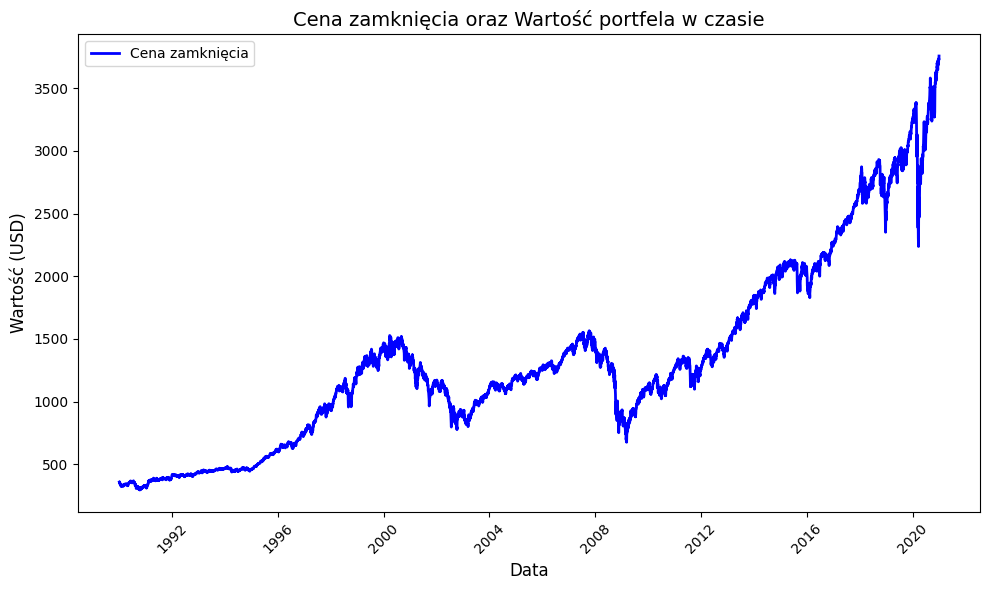

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Wykres cen zamknięcia oraz wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Zamkniecie'
plt.plot(df_main['Date'], df_main['Zamkniecie'], label='Cena zamknięcia', color='blue', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()

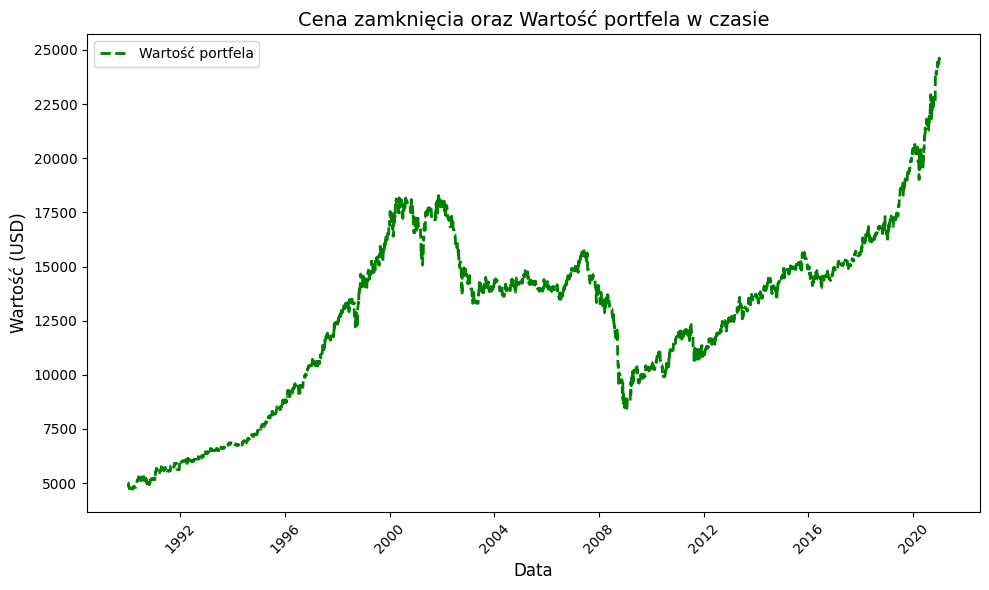

In [48]:
# Wykres cen wartości portfela
plt.figure(figsize=(10, 6))

# Rysowanie wykresu dla 'Portfolio Value'
plt.plot(df_main['Date'], df_main['Portfolio Value'], label='Wartość portfela', color='green', linestyle='--', linewidth=2)

# Dodanie tytułów i etykiet
plt.title('Cena zamknięcia oraz Wartość portfela w czasie', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość (USD)', fontsize=12)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.xticks(rotation=45)  # Obrócenie dat na osi X, aby były czytelniejsze
plt.tight_layout()  # Dopasowanie wykresu do przestrzeni

plt.show()